## ***Todositos***

1 - ~~Implement changes for BPA (23)~~

2 - ~~Reply to Pavel (23)~~

3 - ~~Initiate a slide for RR presentation (23)~~

4 - ~~Complete data description slide (23)~~

5 - Collect all datasets in one dataframe (23)

6 - Do EDA, gap analysis (24)

7 - Write down an email to Ł, explain the data source found and give link to notebook (24)

In [269]:
library(tidyverse)
library(dplyr)
library("readxl")
install.packages("reshape2")
library(reshape2)

Warning message:
"package 'reshape2' is in use and will not be installed"


**Processing World Bank indicators**

In [270]:
# Read indicators from World Bank
wb_indicators_raw <- read_excel("Data\\WDI - WorldBank\\Indicators.xlsx", sheet = "Data")
# Melt dataset to put years to rows
wb_indicators_melted <- melt(wb_indicators_raw, id.vars = c("Country Name", "Country Code", "Series Code", "Series Name"), 
                  variable.name = "Year", value.name = "Value")
# Convert the 'Value' column to numeric, coerce errors
wb_indicators_melted$Value <- as.numeric(as.character(wb_indicators_melted$Value))
# Clean and convert the 'Year' column to numeric
wb_indicators_melted$Year <- gsub("\\[.*\\]", "", wb_indicators_melted$Year)
wb_indicators_melted$Year <- as.numeric(wb_indicators_melted$Year)
# Drop NAs
wb_indicators_long <- na.omit(wb_indicators_melted)
# Convert to wide format, representing each indicator as a column
wb_indicators_wide <- pivot_wider(wb_indicators_long, 
                          id_cols = c("Country Name", "Country Code", "Year"),  # List the columns you want to keep as base dimensions
                          names_from = "Series Code", 
                          values_from = "Value")
# Rename columns
wb_indicators_final <- wb_indicators_wide %>%
        rename(!!!setNames(c("Country Name", "Country Code", "Year"), c("country", "country_code", "year")))
# Sort dataset
wb_indicators_final <- wb_indicators_final %>% arrange (country, year)
# Check final dataset
print(dim(wb_indicators_final))
head(wb_indicators_final)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


[1] 5232   16


country,country_code,year,NY.GDP.PCAP.CD,NY.GDP.PCAP.KD.ZG,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,SP.POP.TOTL,EN.URB.LCTY.UR.ZS,SP.POP.GROW,EN.POP.DNST,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SP.RUR.TOTL,SP.RUR.TOTL.ZS,NY.GDY.TOTL.KN
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,2004,221.8305,-2.497255,29.72107,26.22679,23553551,53.47740,3.933178,36.11234,5299549,22.500,18254002,77.500,NA
Afghanistan,AFG,2005,254.1153,7.321874,31.11485,26.81210,24411191,52.42042,3.576508,37.42727,5542073,22.703,18869118,77.297,NA
Afghanistan,AFG,2006,274.0154,1.084988,28.63597,28.21077,25442944,51.09937,4.139678,39.00916,5828215,22.907,19614729,77.093,NA
Afghanistan,AFG,2007,376.3183,11.803383,30.10501,26.88224,25903301,50.99387,1.793196,39.71498,5987030,23.113,19916271,76.887,NA
Afghanistan,AFG,2008,382.5338,1.864754,24.89227,26.91563,26427199,50.78588,2.002333,40.51822,6162823,23.320,20264376,76.680,NA
Afghanistan,AFG,2009,453.3874,17.143534,29.29750,21.89712,27385307,49.79475,3.561288,41.98719,6443215,23.528,20942092,76.472,NA


**Processing weather variables**

In [271]:
# Read weather datasets
precipitation_raw = read_csv("Data\\Weather\\GDL-Total-Yearly-Precipitation-data.csv", col_types = cols())
humidity_raw = read_csv("Data\\Weather\\GDL-Yearly-Average-Relative-Humidity-data.csv", col_types = cols())
avg_surface_temp_raw = read_csv("Data\\Weather\\GDL-Yearly-Average-Surface-Temperature-(ºC)-data.csv", col_types = cols())
# Common fuction to melt and clean weather datasets
clean_weather_datasets <- function (all_indicators, measure) {
    # Melt dataset to put years to rows
    all_indicators_melted <- melt(all_indicators, id.vars = c("Country", "Continent", "ISO_Code", "Level", "GDLCODE", "Region"), 
                    variable.name = "Year", value.name = "Value")
    # Convert the 'Value' column to numeric, coerce errors
    all_indicators_melted[measure] <- as.numeric(all_indicators_melted$Value)
    # Clean and convert the 'Year' column to numeric
    all_indicators_melted$Year <- as.numeric(as.character(all_indicators_melted$Year))
    # Drop NAs
    all_indicators_final <- na.omit(all_indicators_melted)
    # Drop unnecassary columns
    cols_to_drop <- c("Continent", "Level", "GDLCODE", "Region", "Value")
    all_indicators_final <- df_final %>% select(-one_of(cols_to_drop))
    # Rename columns
    df_final <- df_final %>%
        rename(!!!setNames(c("Country", "ISO_Code", "Year"), c("country", "country_code", "year")))
    # Return cleaned dataframe
    return (df_final)
    }
# Melt and clean weather datasets
precipitation_final <- clean_weather_datasets(precipitation_raw, "precipitation")
humidity_final <- clean_weather_datasets(humidity_raw, "humidity")
avg_surface_temp_final <- clean_weather_datasets(avg_surface_temp_raw, "avg_surface_temp")
# Check dimensions before join
print(paste0("precipitation_final: " ,dim(precipitation_final)[1], " rows"))
print(paste0("humidity_final: " ,dim(humidity_final)[1], " rows"))
print(paste0("avg_surface_temp_final: " ,dim(avg_surface_temp_final)[1], " rows"))
# Inner join precipitation, humidity and avg surface temperature datasets
weather_final <- inner_join(precipitation_final, humidity_final, by = c("country", "country_code", "year")) %>%
             inner_join(avg_surface_temp_final, by = c("country", "country_code", "year"))
# Check dimensions after inner join
print(paste0("weather_final: " ,dim(weather_final)[1], " rows"))
# Sort dataset
weather_final <- weather_final %>% arrange(country, year)
# Check dataset
print(dim(weather_final))
head(weather_final)

[1] "precipitation_final: 6666 rows"
[1] "humidity_final: 6666 rows"
[1] "avg_surface_temp_final: 6666 rows"
[1] "weather_final: 6666 rows"
[1] 6666    6


,country,country_code,year,precipitation,humidity,avg_surface_temp
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,AFG,1990,0.016,46.92,9.466
2,Afghanistan,AFG,1991,0.021,50.84,8.369
3,Afghanistan,AFG,1992,0.019,49.57,8.203
4,Afghanistan,AFG,1993,0.014,46.11,8.754
5,Afghanistan,AFG,1994,0.017,48.90,8.812
6,Afghanistan,AFG,1995,0.016,45.20,8.728


**Processing EU ETS variables**

In [272]:
# Read EU ETS database
eu_ets_raw = read.csv("Data\\EU ETS\\ETS_Database_Jul23.csv", sep = "\t", na.strings = "", fileEncoding = "UTF-8")
# Define the mapping of old names to new names for EUAs
eua_breakdown <- c(
  "1. Total allocated allowances (EUA or EUAA)" = "total_EUAs",
  "1.1 Freely allocated allowances" = "free_EUAs",
  "1.2 Correction to freely allocated allowances (not reflected in EUTL)" = "free_correction_EUAs",
  "1.3 Allowances auctioned or sold (EUAs and EUAAs)" = "auctioned_sold_EUAs"
)
# Drop unnecassary information columns, 
# keep only total EUAs, freely allocated EUAs, correction to freely allocated EUAs and EUAs auctioned or sold
# also rename occurences
eu_ets_raw <- eu_ets_raw %>%
  filter(ETS.information %in% names(eua_breakdown)) %>%
  mutate(ETS.information = case_when(
    ETS.information %in% names(eua_breakdown) ~ eua_breakdown[ETS.information],
    TRUE ~ ETS.information
  ))
# Define the mapping of old names to new names for sector breakdown
sector_breakdown <- c(
    "20-99 All stationary installations" = "all_stationary",
    "10 Aviation" = "aviation")
# Drop sector breakdown, just include all stationary installations and aviation
# also rename occurences
eu_ets_raw <- eu_ets_raw %>%
  filter(main.activity.sector.name %in% names(sector_breakdown)) %>%
  mutate(main.activity.sector.name = case_when(
    main.activity.sector.name %in% names(sector_breakdown) ~ sector_breakdown[main.activity.sector.name],
    TRUE ~ main.activity.sector.name
  ))
# Remove period aggregates and keep years only
eu_ets_raw <- eu_ets_raw %>% filter(nchar(year) == 4)
# Convert to wide format, representing each EUA breakdown as a column
eu_ets_wide <- pivot_wider(eu_ets_raw, 
                          id_cols = c("country", "country_code", "year"),  # List the columns you want to keep as base dimensions
                          names_from = "ETS.information", 
                          values_from = "value",
                          values_fn = sum)
# Fill NAs with 0
eu_ets_wide[is.na(eu_ets_wide)] <- 0
# Convert year column to numeric
eu_ets_wide$year <- as.numeric(eu_ets_wide$year)
# Apply correction to freely allocated EUAs
eu_ets_wide$free_EUAs <- eu_ets_wide$free_EUAs + eu_ets_wide$free_correction_EUAs
# Drop correction to freely allocated EUAs column
eu_ets_wide$free_correction_EUAs <- NULL
# Rename Northen Ireland to UK
eu_ets_wide$country <- ifelse(eu_ets_wide$country %in% c("United Kingdom (excl. NI)", "Northern Ireland"), "United Kingdom", eu_ets_wide$country)
eu_ets_wide$country_code <- ifelse(eu_ets_wide$country %in% c("United Kingdom (excl. NI)", "Northern Ireland"), "UK", eu_ets_wide$country_code)
# Aggregate Northen Ireland to UK
eu_ets_final <- eu_ets_wide %>% 
  group_by(country, country_code, year) %>% 
  summarize(
    free_EUAs = sum(free_EUAs),
    total_EUAs = sum(total_EUAs),
    auctioned_sold_EUAs = sum(auctioned_sold_EUAs)
  )
# Sort dataset by country and year
eu_ets_final <- eu_ets_wide %>% arrange(country, year)
# Check dataset
print(dim(eu_ets_final))
head(eu_ets_final)

`summarise()` has grouped output by 'country', 'country_code'. You can override
using the `.groups` argument.


[1] 623   6


country,country_code,year,free_EUAs,total_EUAs,auctioned_sold_EUAs
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Austria,AT,2005,32412654,32412654,0
Austria,AT,2006,32649366,32649366,0
Austria,AT,2007,32729289,32729289,0
Austria,AT,2008,30718182,30718182,0
Austria,AT,2009,30313132,30718182,405050
Austria,AT,2010,30563812,30963812,400000


**Processing PM2.5 variables**

In [273]:
# Read PM2.5 data from WHO
pm25_raw = read.csv("Data\\WHO PM2.5\\SDG Indicator 11.6.2. Concentrations of PM2.5.csv")
# Define the mapping of old names to new names for the whole dataset
pm25_columns_old <- c("SpatialDimValueCode", "Location", "Period", "Dim1", "FactValueNumeric", "FactValueNumericLow", "FactValueNumericHigh")
pm25_columns_new <- c("country_code", "country", "year", "residence_area", "PM25", "PM25_low", "PM25_high")
# Drop unnecessary columns
pm25_raw <- pm25_raw %>% select(pm25_columns_old)
# Rename respective columns
pm25_raw <- pm25_raw %>% rename(!!!setNames(pm25_columns_old,pm25_columns_new))
# Convert to long format, also pulling residence area breakdown to columns
pm25_long <- pm25_raw %>%
  pivot_wider(names_from = residence_area,
              values_from = c(PM25, PM25_low, PM25_high),
              names_glue = "{.value}_{residence_area}")
# Sort dataset
pm25_final <- pm25_long %>% arrange (country,year)
# Check dataset
print(dim(pm25_final))
head(pm25_final)
# pm25_long[(pm25_long$country_code == "DEU"),]

[1] 1950   18


country_code,country,year,PM25_Cities,PM25_rural,PM25_Total,PM25_Towns,PM25_Urban,PM25_low_Cities,PM25_low_rural,PM25_low_Total,PM25_low_Towns,PM25_low_Urban,PM25_high_Cities,PM25_high_rural,PM25_high_Total,PM25_high_Towns,PM25_high_Urban
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AFG,Afghanistan,2010,92.79,61.81,68.97,69.67,83.13,66.17,42.68,49.48,48.91,60.37,128.4,87.77,96.51,98.81,117.8
AFG,Afghanistan,2011,89.57,60.11,66.94,67.72,80.45,64.75,42.82,48.90,48.37,57.67,122.9,83.13,92.62,93.74,110.7
AFG,Afghanistan,2012,92.04,61.09,68.26,68.88,82.40,66.43,42.74,49.60,49.03,58.99,125.9,83.77,94.02,95.50,112.4
AFG,Afghanistan,2013,97.49,64.50,72.18,73.01,87.33,70.24,45.48,52.57,51.94,62.40,132.9,88.98,99.67,101.70,118.9
AFG,Afghanistan,2014,91.92,60.79,68.06,68.85,82.36,66.24,42.86,49.36,49.33,58.88,125.7,83.22,93.43,95.36,111.5
AFG,Afghanistan,2015,90.88,59.99,67.20,67.90,81.38,65.86,42.52,49.05,48.45,58.50,123.3,81.99,92.67,94.10,110.1


**Combining datasets**

In [438]:
# A common function to remap country names to be consistent across data sources
map_countries <- function(df, column_to_map) {
  mapping_dict <- c(
    "Argentina urban" = "Argentina",
    "Bahamas, The" = "Bahamas",
    "Bolivia (Plurinational State of)" = "Bolivia",
    "Cape Verde" = "Cabo Verde",
    "Central African Republic CAR" = "Central African Republic",
    "Chili" = "Chile",
    "Congo Democratic Republic" = "Congo, Dem. Rep.",
    "Congo, Rep." = "Congo, Dem. Rep.",
    "Czech Republic" = "Czechia",
    "Democratic Republic of the Congo" = "Congo, Dem. Rep.",
    "Egypt, Arab Rep." = "Egypt",
    "Gambia, The" = "Gambia",
    "Guinea Bissau" = "Guinea-Bissau",
    "Iran (Islamic Republic of)" = "Iran",
    "Iran, Islamic Rep." = "Iran",
    "Democratic People's Republic of Korea" = "Korea",
    "Korea, Dem. People's Rep." = "Korea",
    "Korea, Rep." = "Korea",
    "Republic of Korea" = "Korea",
    "Kyrgyz Republic" = "Kyrgyzstan",
    "Lao People's Democratic Republic" = "Lao",
    "Lao PDR" = "Lao",
    "Micronesia (Federated States of)" = "Micronesia, Fed. Sts.",
    "Monte Negro" = "Montenegro",
    "Republic of Moldova" = "Moldova",
    "Sao Tome & Principe" = "Sao Tome and Principe",
    "Slovak Republic" = "Slovakia",
    "Syrian Arab Republic" = "Syria",
    "The former Yugoslav Republic of Macedonia" = "North Macedonia",
    "Timor-Leste" = "Timor Leste",
    "Trinidad & Tobago" = "Trinidad and Tobago",
    "Türkiye" = "Turkey",
    "Turkiye" = "Turkey",
    "United States of America" = "United States",
    "Venezuela (Bolivarian Republic of)" = "Venezuela",
    "Venezuela, RB"  = "Venezuela",
    "Viet Nam" = "Vietnam",
    "Yemen, Rep." = "Yemen",
    "United Kingdom of Great Britain and Northern Ireland" = "United Kingdom"
  )
  
  df[[column_to_map]] <- ifelse(df[[column_to_map]] %in% names(mapping_dict), 
                                mapping_dict[df[[column_to_map]]], 
                                df[[column_to_map]])
  
  return(df)
}

# Map country names in each dataset
pm25_final_mapped <- map_countries(pm25_final, "country")
eu_ets_final_mapped <- map_countries(eu_ets_final, "country")
weather_final_mapped <- map_countries(weather_final, "country")
wb_indicators_final_mapped <- map_countries(wb_indicators_final, "country")

# Join each dataset, keeping PM2.5 dataset as the main one to join on
all_indicators <- merge(pm25_final_mapped, subset(eu_ets_final_mapped, select = -country_code), by = c("year", "country"), all.x = TRUE) %>%
    merge(subset(weather_final_mapped, select = -country_code), by = c("year", "country"), all.x = TRUE) %>%
    merge(subset(wb_indicators_final_mapped, select = -country_code), by = c("year", "country"), all.x = TRUE)

# Check final dataset
print(dim(all_indicators))
head(all_indicators)

[1] 2050   37


,year,country,country_code,PM25_Cities,PM25_rural,PM25_Total,PM25_Towns,PM25_Urban,PM25_low_Cities,PM25_low_rural,⋯,NV.IND.TOTL.ZS,SP.POP.TOTL,EN.URB.LCTY.UR.ZS,SP.POP.GROW,EN.POP.DNST,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SP.RUR.TOTL,SP.RUR.TOTL.ZS,NY.GDY.TOTL.KN
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2010,Afghanistan,AFG,92.79,61.81,68.97,69.67,83.13,66.17,42.68,⋯,21.15142,28189672,49.15285,2.894904,43.22045,6691382,23.737,21498290,76.263,NA
2,2010,Albania,ALB,22.24,21.38,21.95,22.37,22.30,20.06,19.01,⋯,24.93746,2913021,26.89647,-0.496462,106.31464,1519519,52.163,1393502,47.837,1.239645e+12
3,2010,Algeria,DZA,21.67,21.72,21.27,20.29,21.02,14.19,13.97,⋯,49.96743,35856344,10.04247,1.858702,15.05468,24217375,67.540,11638969,32.460,1.405517e+13
4,2010,Andorra,AND,NA,10.53,11.43,11.88,11.88,NA,8.69,⋯,13.12565,71519,NA,-3.209994,152.16809,63522,88.819,7997,11.181,NA
5,2010,Angola,AGO,27.20,23.59,24.20,24.33,26.53,5.35,6.25,⋯,52.36844,23364185,37.94772,3.734798,18.74082,13967811,59.783,9396374,40.217,1.296739e+12
6,2010,Antigua and Barbuda,ATG,NA,7.99,8.17,8.29,8.29,NA,5.09,⋯,16.20415,85695,NA,1.364066,194.76136,22485,26.238,63210,73.762,NA


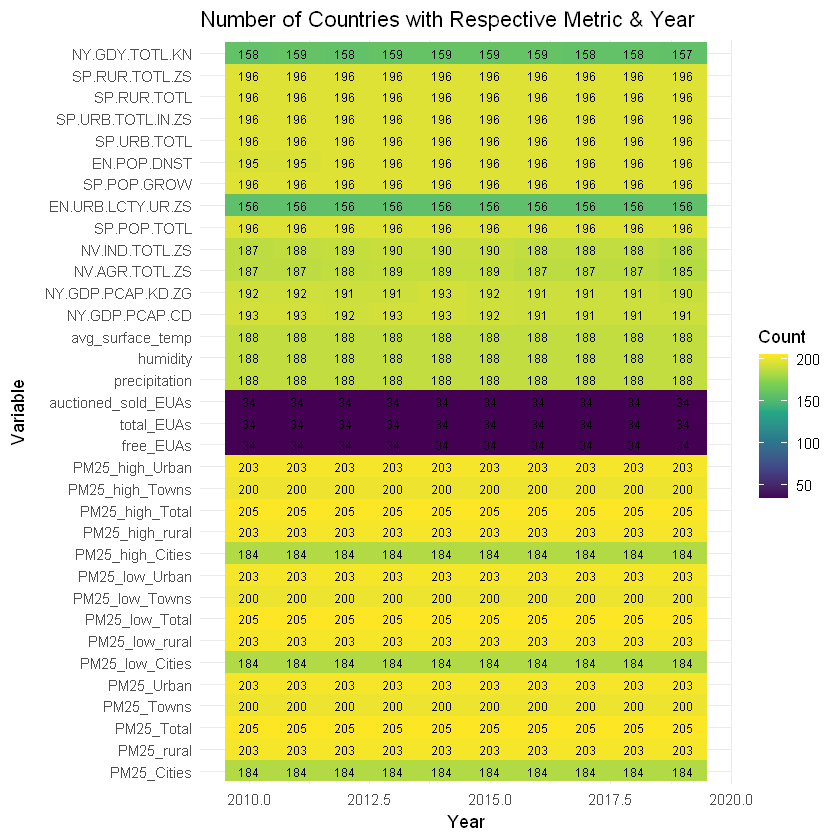

In [318]:

# Calculate the number of non-NA values for each column
non_na_counts <- all_indicators %>%
  select(-c(country,country_code)) %>%
  group_by(year) %>%
  summarize(across(everything(), ~sum(!is.na(.))))

# Reshape the data for plotting while retaining column order
non_na_counts_long <- non_na_counts %>%
  pivot_longer(cols = -year, names_to = "variable", values_to = "count") %>%
  mutate(variable = factor(variable, levels = colnames(non_na_counts)[-1]))  # Exclude the "year" column from levels

# Create the heatmap
heatmap_plot <- ggplot(data = non_na_counts_long, aes(x = year, y = variable, fill = count)) +
  geom_tile() +
  scale_fill_viridis_c() +  # Choose color palette
  geom_text(aes(label = ifelse(is.na(count), "", count)), size = 2.5, color = "black") +  # Add text labels with small font
  labs(title = "Number of Countries with Respective Metric & Year",
       x = "Year",
       y = "Variable",
       fill = "Count") +
  theme_minimal()
# Display the heatmap
print(heatmap_plot)

**Matching**

In [437]:
# Install and load the MatchIt library
if (!requireNamespace("MatchIt", quietly = TRUE)) {install.packages("MatchIt")}
library(MatchIt)

# Install and load the lmtest library
if (!requireNamespace("lmtest", quietly = TRUE)) {install.packages("lmtest")}
library(lmtest)

# Install and load the sandwich library
if (!requireNamespace("sandwich", quietly = TRUE)) {install.packages("sandwich")}
library(sandwich)

In [440]:
# Apply log transformation to each column separately
all_indicators$precipitation_log <- log(all_indicators$precipitation+0.01)
all_indicators$humidity_log <- log(all_indicators$humidity)
all_indicators$avg_surface_temp_log <- log(all_indicators$avg_surface_temp - min(all_indicators$avg_surface_temp,na.rm = TRUE) + 0.01)
all_indicators$gdp_per_capita_log <- log(all_indicators$NY.GDP.PCAP.CD)
all_indicators$gdp_per_capita_growth_pct <- all_indicators$NY.GDP.PCAP.KD.ZG
all_indicators$agriculture_pct_gdp <- all_indicators$NV.AGR.TOTL.ZS
all_indicators$industry_pct_gdp <- all_indicators$NV.IND.TOTL.ZS
all_indicators$population_log <- log(all_indicators$SP.POP.TOTL)
all_indicators$population_in_largest_city_pct_of_urban_pop <- all_indicators$EN.URB.LCTY.UR.ZS
all_indicators$population_growth_pct <- all_indicators$SP.POP.GROW
all_indicators$population_density_log <- log(all_indicators$EN.POP.DNST)
all_indicators$population_urban_log <- log(all_indicators$SP.URB.TOTL)
all_indicators$population_urban_pct_of_total <- all_indicators$SP.URB.TOTL.IN.ZS
all_indicators$population_rural_log <- log(all_indicators$SP.RUR.TOTL)
all_indicators$population_rural_pct_of_total <- all_indicators$SP.RUR.TOTL.ZS
all_indicators$gni_log <- log(all_indicators$NY.GDY.TOTL.KN)

all_indicators_renamed <- all_indicators %>% select(year, country, country_code, precipitation_log, humidity_log, avg_surface_temp_log, gdp_per_capita_log,
gdp_per_capita_growth_pct, agriculture_pct_gdp, industry_pct_gdp, population_log, population_in_largest_city_pct_of_urban_pop,
population_growth_pct, population_density_log, population_urban_log, population_urban_pct_of_total, population_rural_log,
population_rural_pct_of_total, gni_log, total_EUAs, PM25_Total, PM25_Urban, PM25_rural
)

head(all_indicators_renamed)

,year,country,country_code,precipitation_log,humidity_log,avg_surface_temp_log,gdp_per_capita_log,gdp_per_capita_growth_pct,agriculture_pct_gdp,industry_pct_gdp,⋯,population_density_log,population_urban_log,population_urban_pct_of_total,population_rural_log,population_rural_pct_of_total,gni_log,total_EUAs,PM25_Total,PM25_Urban,PM25_rural
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2010,Afghanistan,AFG,-3.688879,3.771611,2.415824,6.332390,11.0992199,26.2100685,21.15142,⋯,3.766314,15.71633,23.737,16.883484,76.263,NA,NA,68.97,83.13,61.81
2,2010,Albania,ALB,-2.617296,4.284827,2.611466,8.317363,4.2230838,17.9558664,24.93746,⋯,4.666403,14.23390,52.163,14.147331,47.837,27.84585,NA,21.95,22.30,21.38
3,2010,Algeria,DZA,-3.816713,3.927699,2.971388,8.410926,1.6921701,8.4664436,49.96743,⋯,2.711689,17.00258,67.540,16.269869,32.460,30.27401,NA,21.27,21.02,21.72
4,2010,Andorra,AND,-3.146555,4.281792,1.596353,10.783900,1.2226877,0.4665086,13.12565,⋯,5.024986,11.05914,88.819,8.986822,11.181,NA,NA,11.43,11.88,10.53
5,2010,Angola,AGO,-3.057608,4.152613,3.151838,8.184978,0.5712209,6.1802935,52.36844,⋯,2.930704,16.45227,59.783,16.055834,40.217,27.89087,NA,24.20,26.53,23.59
6,2010,Antigua and Barbuda,ATG,-2.956512,4.369195,3.309776,9.503347,-9.0891748,1.6334085,16.20415,⋯,5.271775,10.02060,26.238,11.054218,73.762,NA,NA,8.17,8.29,7.99


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.



Call:
matchit(formula = is_eu_ets ~ precipitation_log + humidity_log + 
    avg_surface_temp_log + gdp_per_capita_log + gdp_per_capita_growth_pct + 
    agriculture_pct_gdp + industry_pct_gdp + population_log + 
    population_in_largest_city_pct_of_urban_pop + population_growth_pct + 
    population_density_log + population_urban_log + population_urban_pct_of_total + 
    population_rural_pct_of_total + gni_log, data = all_indicators_renamed, 
    method = "nearest", distance = "glm", replace = FALSE, ratio = 1)

Summary of Balance for All Data:
                                            Means Treated Means Control
distance                                           0.7277        0.0534
precipitation_log                                 -3.1221       -2.8296
humidity_log                                       4.1965        3.7797
avg_surface_temp_log                               2.3130        2.6894
gdp_per_capita_log                                10.3315        7.7207
gdp_per_capita

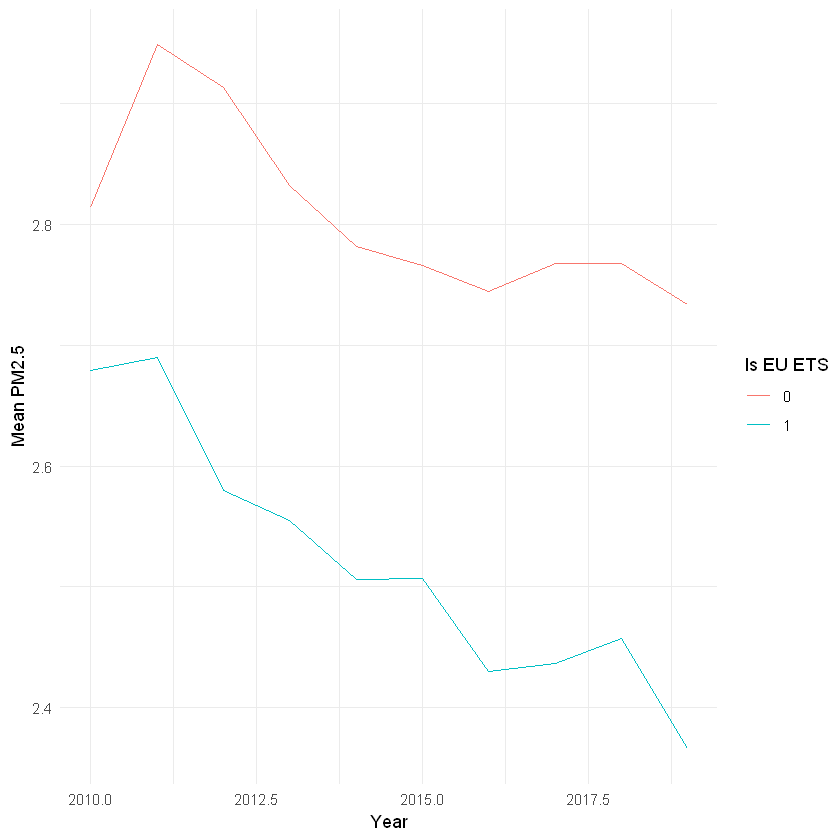

In [450]:
#Using the mathcit function from MatchIt to match each smoker with a non-smoker (1 to 1 matching) based on
#sex, indigeneity status, high school completion, marital status (partnered or not),
#region of residence (major cities, inner regional, outer regional), language background (English speaking Yes/No) 
#and risky alcohol drinking (Yes/No)

all_indicators_renamed$total_EUAs <- ifelse(is.na(all_indicators_renamed$total_EUAs),0,all_indicators$total_EUAs)

all_indicators_renamed$is_eu_ets <- ifelse(all_indicators_renamed$total_EUAs>0,TRUE,FALSE)

all_indicators_renamed[is.na(all_indicators_renamed)] <- 0

match_obj <- matchit(is_eu_ets ~ 
                      precipitation_log 
                      + humidity_log
                      + avg_surface_temp_log 
                      + gdp_per_capita_log 
                      + gdp_per_capita_growth_pct + agriculture_pct_gdp
                      + industry_pct_gdp + population_log + population_in_largest_city_pct_of_urban_pop + population_growth_pct
                      + population_density_log + population_urban_log + population_urban_pct_of_total 
                      # + population_rural_log
                      + population_rural_pct_of_total
                       + gni_log
  ,data = all_indicators_renamed, method = "nearest", distance ="glm",
  ratio = 1,
  replace = FALSE)

matched_subset <-match.data(match_obj)

summary_df <- matched_subset %>%
  group_by(year, is_eu_ets) %>%
  summarise(mean_pm25 = mean(log(PM25_Total)))

# Plotting
ggplot(summary_df, aes(x = year, y = mean_pm25, color = factor(is_eu_ets))) +
  geom_line() +
  labs(x = "Year", y = "Mean PM2.5", color = "Is EU ETS") +
  theme_minimal()

summary(match_obj)
# #plotting the balance between smokers and non-smokers
# plot(match_obj, type = "jitter", interactive = FALSE)
# plot(summary(match_obj), abs = FALSE)

In [455]:
unique(matched_subset[matched_subset$is_eu_ets == FALSE,"country"])

[1] "Andorra"                "Armenia"                "Australia"             
 [4] "Bahamas"                "Bosnia and Herzegovina" "Cabo Verde"            
 [7] "Canada"                 "Costa Rica"             "Croatia"               
[10] "Cuba"                   "Georgia"                "Iceland"               
[13] "Israel"                 "Jamaica"                "Japan"                 
[16] "Korea"                  "Lebanon"                "Mauritius"             
[19] "Monaco"                 "Montenegro"             "New Zealand"           
[22] "North Macedonia"        "Russian Federation"     "San Marino"            
[25] "Serbia"                 "South Africa"           "Switzerland"           
[28] "Ukraine"                "United States"          "Bahrain"               
[31] "Iran"                   "Kazakhstan"             "Libya"                 
[34] "Seychelles"             "Turkey"                 "United Arab Emirates"  
[37] "Brazil"                 "Brunei Darussalam"      "Chile"                 
[40] "Mongolia"               "Belarus"                "Mexico"                
[43] "Singapore"              "Syria"                  "El Salvador"

In [424]:
head(matched_subset)

,year,country,country_code,precipitation_log,humidity_log,avg_surface_temp_log,gdp_per_capita_log,gdp_per_capita_growth_pct,agriculture_pct_gdp,industry_pct_gdp,⋯,population_urban_pct_of_total,population_rural_log,population_rural_pct_of_total,gni_log,total_EUAs,PM25_Total,is_eu_ets,distance,weights,subclass
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<fct>
1,2010,Afghanistan,AFG,-3.688879,3.771611,2.415824,6.332390,11.099220,26.2100685,21.15142,⋯,23.737,16.883484,76.263,0.00000,0,68.97,FALSE,0.1737514,1,204
2,2010,Albania,ALB,-2.617296,4.284827,2.611466,8.317363,4.223084,17.9558664,24.93746,⋯,52.163,14.147331,47.837,27.84585,0,21.95,FALSE,0.2009693,1,185
4,2010,Andorra,AND,-3.146555,4.281792,1.596353,10.783900,1.222688,0.4665086,13.12565,⋯,88.819,8.986822,11.181,0.00000,0,11.43,FALSE,0.5484427,1,105
8,2010,Armenia,ARM,-3.270169,4.182813,2.284828,8.052942,2.824482,0.0000000,0.00000,⋯,63.440,13.889843,36.560,28.97109,0,40.90,FALSE,0.2867589,1,302
10,2010,Austria,AUT,-2.937463,4.342116,1.934127,10.755853,1.592577,1.2673277,25.53499,⋯,57.399,15.086084,42.601,26.51003,30963812,15.62,TRUE,0.4358261,1,1
11,2010,Azerbaijan,AZE,-3.473768,4.220537,2.632536,8.673091,3.806491,5.5212528,59.77134,⋯,53.406,15.255055,46.594,24.06965,0,30.11,FALSE,0.2097547,1,108


In [425]:
matched_subset %>% group_by(year, is_eu_ets) %>% summarise (mean_pm25 = mean(PM25_Total))

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,is_eu_ets,mean_pm25
<int>,<lgl>,<dbl>
2010,FALSE,26.39694
2010,TRUE,15.30875
2011,FALSE,27.26125
2011,TRUE,15.50313
2012,FALSE,29.58030
2012,TRUE,13.96147
2013,FALSE,26.77727
2013,TRUE,13.58706
2014,FALSE,27.99414


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


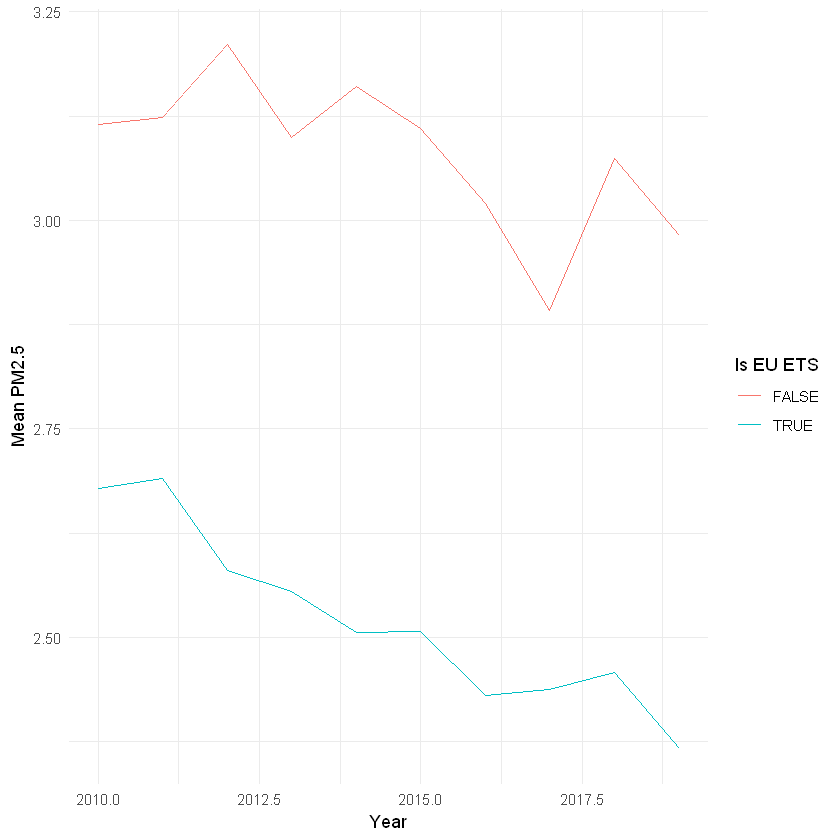

In [268]:
  # Select unique combinations of "country" and "country_code" from pm25_final
  pm25_unique <- pm25_final_mapped %>%
    select(country) %>%
    unique()

  pm25_unique$pm <- 1

  # Select unique combinations of "country" and "country_code" from eu_ets_final
  eu_ets_unique <- eu_ets_final_mapped %>%
    select(country) %>%
    unique()

  eu_ets_unique$euets <- 1

  # Select unique combinations of "country" and "country_code" from weather_final
  weather_unique <- weather_final_mapped %>%
    select(country) %>%
    unique()

  weather_unique$weather <- 1

  # Select unique combinations of "country" and "country_code" from wb_indicators_final
  wb_indicators_unique <- wb_indicators_final_mapped %>%
    select(country) %>%
    unique()

  wb_indicators_unique$wb <- 1

# Union the datasets
unioned_dimensions <- bind_rows(pm25_unique, eu_ets_unique, weather_unique, wb_indicators_unique)

# Add origin indicators to each dataset
pm25_unique$pm <- 1
eu_ets_unique$euets <- 1
weather_unique$weather <- 1
wb_indicators_unique$wb <- 1

# Perform full joins
joined_df <- full_join(pm25_unique, eu_ets_unique, by = "country") %>%
             full_join(weather_unique, by = "country") %>%
             full_join(wb_indicators_unique, by = "country")

joined_df[is.na(joined_df)] <- 0

joined_df$total = joined_df$pm + joined_df$euets + joined_df$weather + joined_df$wb

joined_df <- joined_df %>% arrange (pm, total)

joined_df[joined_df$total < 3,]


country,pm,euets,weather,wb,total
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NER 300 auctions,0,1,0,0,1
Congo Brazzaville,0,0,1,0,1
FInland,0,0,1,0,1
Jersey,0,0,1,0,1
Palestine,0,0,1,0,1
South Korea,0,0,1,0,1
Svalbard and Jan Mayen,0,0,1,0,1
Turks & Caicos Islands,0,0,1,0,1
Vatican City,0,0,1,0,1
